## Deep Neural Network model with PCA and MCA
*Summary:* In this notebook, we train a DNN model using PCA for numerical features and MCA for categorical features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv("../dataset/UNSW_NB15_testing-set.csv")

In [ ]:
df = pd.concat([train, test]).reset_index(drop=True)
attack_cat_df = df['attack_cat']
df = df.drop(columns=['id', 'attack_cat', 'label'], axis=1)

num_cols = df._get_numeric_data().columns[:-1]

# subtract numeric columns and classifier columns ('attack_cat', 'label') from all columns to get categorical columns 
cat_cols = list(set(df.columns) - set(num_cols) - {'attack_cat', 'label'})

# apply multiple correspondence analysis
mca = MCA(n_components=-1)
mca = mca.fit(df[cat_cols])
mca_df = pd.DataFrame(mca)

# apply min-max scaler that scales the variables in the range [0-1]
scl = MinMaxScaler()
df[num_cols] = scl.fit_transform(df[num_cols])

# apply principal component analysis
pca = PCA(n_components=0.95)
pca = pca.fit_transform(df[num_cols])
pca_df = pd.DataFrame(pca)

# print(mca.row_contributions_.shape, pca.shape)
pd.concat([pca_df, mca_df], axis=1)

In [2]:
df = pd.concat([train, test]).reset_index(drop=True)
attack_cat_df = df['attack_cat']
df = df.drop(columns=['id', 'attack_cat', 'label'], axis=1)

# get numeric column names without label column
num_cols = df._get_numeric_data().columns

# subract numeric columns from all columns to get categorical columns 
cat_cols = list(set(df.columns) - set(num_cols))

print(f"Numerical features: {len(num_cols)}\nCategorical features: {len(cat_cols)}")

Numerical features: 39
Categorical features: 3


In [57]:
from prince import FAMD

famd = FAMD(
    n_components=10,
    n_iter=10,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn"
)
famd = famd.fit(df)

In [58]:
famd._eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,12.932935,4.789976,4.789976
1,4.760978,1.763325,6.553301
2,3.842806,1.423261,7.976563
3,3.369149,1.247833,9.224396
4,3.182368,1.178655,10.403051
5,3.091820,1.145118,11.548169
6,2.998804,1.110668,12.658837
7,2.798410,1.036448,13.695285
8,2.327245,0.861943,14.557228


In [59]:
famd.plot(df.iloc[:5000], 1, 2)

alt.LayerChart(...)

In [4]:
from prince import MCA

# apply multiple correspondence analysis
mca = MCA(n_components=-1)
mca = mca.fit(df[cat_cols])
mca.scree_plot()

In [38]:
# mca.plot(mca.row_contributions_)
mca.

-1

In [ ]:
mca

In [13]:
mca.column_cosine_similarities(df[cat_cols])

,0,1,2,3,4,5,6,7
state_ACC,0.000013,2.002619e-08,9.254714e-07,0.000156,0.002676,0.027449,1.271415e-02,5.140036e-04
state_CLO,0.000002,3.802180e-09,3.507198e-06,0.001088,0.010760,0.014243,2.758653e-03,1.572746e-04
state_CON,0.059554,1.117127e-05,9.843098e-02,0.029149,0.172475,0.000008,4.332353e-07,5.582214e-05
state_ECO,0.000005,7.997213e-01,6.142612e-05,0.000161,0.000153,0.000027,1.015685e-03,3.010316e-04
state_FIN,0.867430,1.329641e-04,4.702847e-02,0.003941,0.000839,0.000005,7.859584e-06,5.891554e-07
...,...,...,...,...,...,...,...,...
service_radius,0.000129,3.308439e-09,1.266525e-04,0.000862,0.000067,0.001074,1.194653e-03,2.513399e-03
service_smtp,0.043681,1.711563e-05,1.710441e-02,0.003467,0.002494,0.023938,3.566961e-03,1.882771e-03
service_snmp,0.000686,1.496633e-10,2.015626e-04,0.000871,0.014391,0.000285,6.711277e-04,9.102574e-04
service_ssh,0.009463,2.843026e-06,3.842648e-03,0.000002,0.019310,0.002578,1.904150e-03,1.766913e-04


In [25]:
# apply min-max scaler that scales the variables in the range [0-1]
scl = MinMaxScaler()
df = scl.fit_transform(df)

In [31]:
from sklearn.decomposition import PCA

# apply principal component analysis
pca = PCA(n_components=0.95)
pca_df = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_df)

pca_df

,0,1,2,3,4,5,6,7,8,9,10
0,-0.782517,-0.019278,-0.434279,-0.143849,-0.143722,-0.033623,0.053112,-0.000026,0.068036,-0.075005,0.023751
1,-0.775704,-0.034400,-0.453373,-0.119990,-0.200415,-0.045221,0.130624,0.140866,0.302216,-0.057119,-0.099826
2,-0.794653,-0.036226,-0.421886,-0.142256,-0.174053,-0.039984,0.092364,0.078309,0.138112,0.009949,-0.038697
3,-0.796393,-0.035295,-0.404071,-0.137547,-0.159845,-0.036886,0.078807,0.052981,0.119915,-0.016534,-0.022682
4,-0.779061,-0.043580,-0.425183,-0.102118,-0.205160,-0.045878,0.145981,0.171237,0.388044,-0.082036,-0.133514
...,...,...,...,...,...,...,...,...,...,...,...
257668,-1.006850,-0.187477,0.439006,0.083193,0.021705,0.005563,0.009638,-0.014605,0.018156,-0.078166,-0.018483
257669,1.145673,-0.577834,-0.089745,-0.236487,0.166209,0.049098,0.256501,-0.197499,-0.016913,0.008683,0.029062
257670,-0.843997,-0.061730,-0.169242,-0.048666,-0.118811,-0.027163,0.062178,0.038015,-0.024258,-0.082422,0.047073
257671,-1.064012,-0.231827,0.651510,0.123628,0.070601,0.016876,-0.013917,-0.035156,0.040819,-0.078037,-0.029928


In [35]:
from sklearn.model_selection import train_test_split

y = pd.get_dummies(attack_cat_df)
X = pca_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((172640, 11), (85033, 11), (172640, 10), (85033, 10))

### Tensorflow model

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
plt.style.use('ggplot')
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [37]:
model = keras.Sequential(
    [
        layers.Dense(256, activation='relu', input_dim=X_train.shape[1]),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(10, activation='softmax', use_bias=True)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 86,794
Trainable params: 86,794
Non-traina

In [38]:
model.compile('adam', loss='categorical_crossentropy', metrics='accuracy')

monitor_val_acc = EarlyStopping(monitor='loss', patience=10)
callbacks=[PlotLossesKeras()]

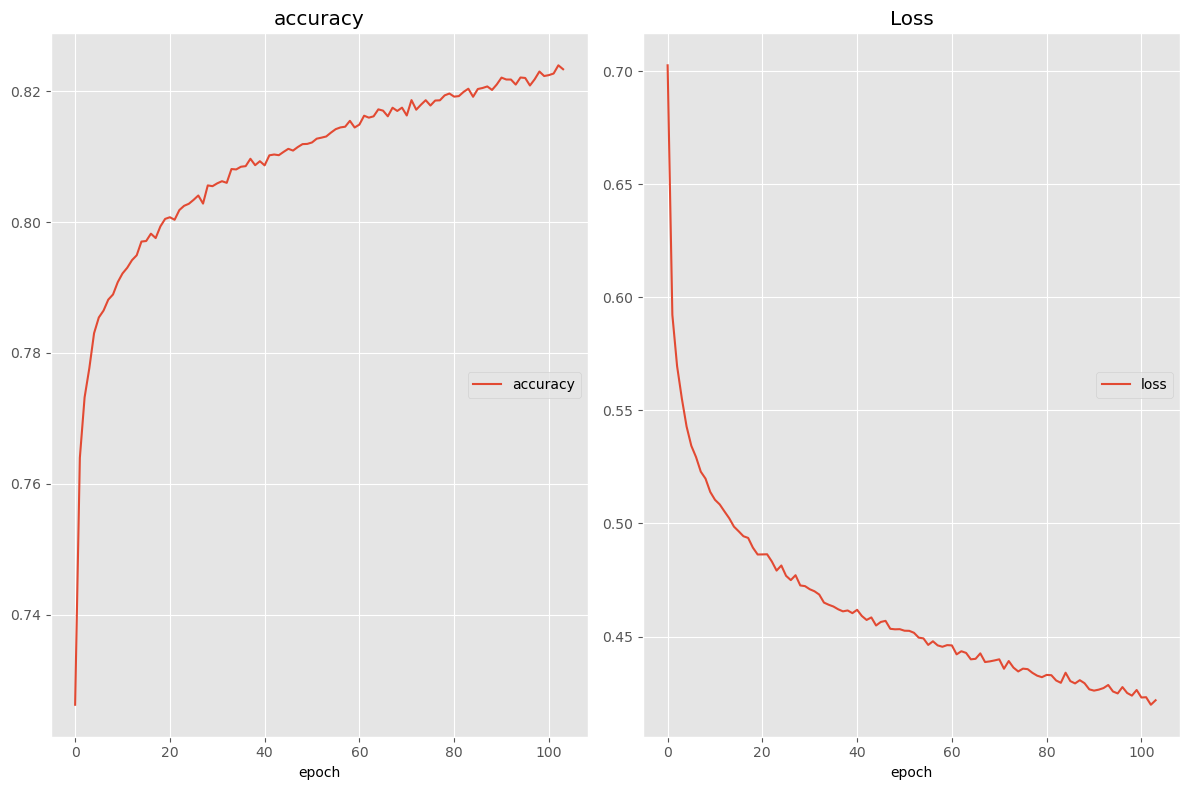

accuracy
	accuracy         	 (min:    0.726, max:    0.824, cur:    0.823)
Loss
	loss             	 (min:    0.420, max:    0.703, cur:    0.422)


In [39]:
model.fit(X_train, y_train, epochs=1000, batch_size=128, callbacks=[PlotLossesKeras(), monitor_val_acc], shuffle=1000, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)